In [1]:
import pandas as pd
from pandas import read_csv
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(style="whitegrid", font_scale=1.6)

In [2]:
accuracy_measure = read_csv('data/accuracy_measure_detailed.csv')
accuracy_measure.head(5)

,Model,Freight Mode,Precision,Recall,F1-Score,Sample size
0,RF,Air,1.00,1.00,1.00,378
1,RF,For-hire truck,0.90,0.88,0.89,20964
2,RF,Parcel,1.00,1.00,1.00,12785
3,RF,Private truck,0.83,0.86,0.85,14474
4,RF,Rail/IMX,1.00,1.00,1.00,816


In [3]:
# accuracy by mode
mode_selected = ['For-hire truck', 'Private truck', 'Air', 'Parcel', 'Rail/IMX']
accuracy_measure_by_mode = \
accuracy_measure.loc[accuracy_measure['Freight Mode'].isin(mode_selected)]
accuracy_measure_by_mode = pd.melt(accuracy_measure_by_mode, 
                                id_vars=['Model', 'Freight Mode'], 
                                value_vars=['Precision', 'Recall', 'F1-Score'],
                                var_name='measures', 
                                value_name='values')
accuracy_measure_by_mode = accuracy_measure_by_mode.reset_index()
print(accuracy_measure_by_mode.Model.unique())
accuracy_measure_by_mode.head(5)


['RF' 'XGBoost' 'CatBoost' 'bMNL' 'aMNL']


,index,Model,Freight Mode,measures,values
0,0,RF,Air,Precision,1.00
1,1,RF,For-hire truck,Precision,0.90
2,2,RF,Parcel,Precision,1.00
3,3,RF,Private truck,Precision,0.83
4,4,RF,Rail/IMX,Precision,1.00


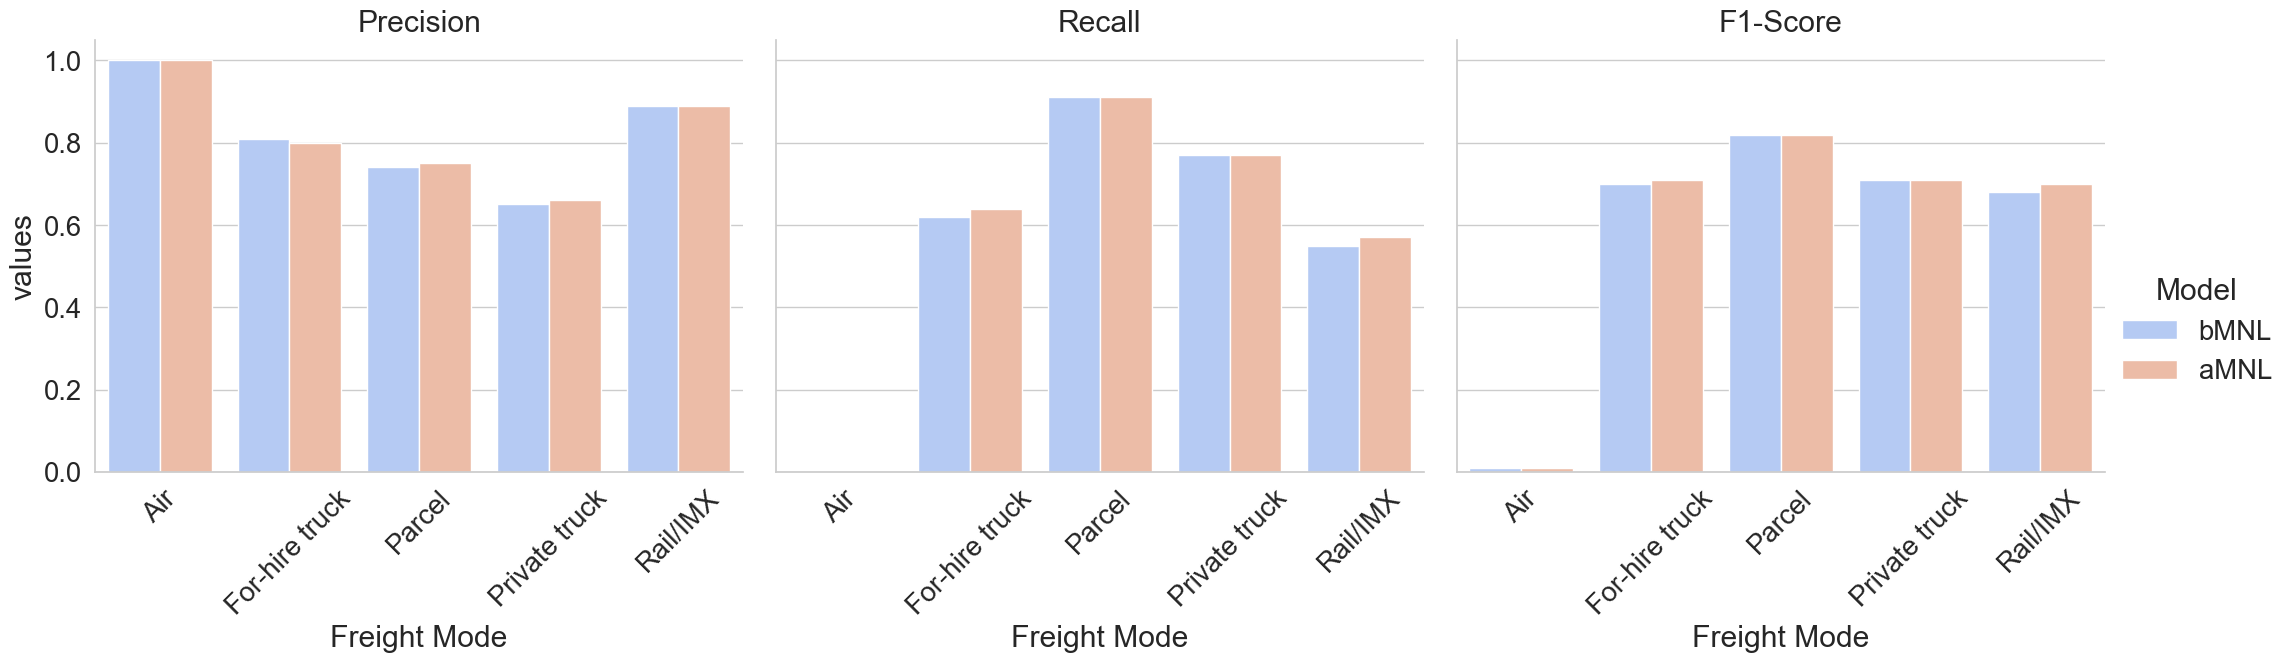

In [6]:
accuracy_measure_by_mode_MNL = \
accuracy_measure_by_mode.loc[accuracy_measure_by_mode['Model'].isin(['bMNL', 'aMNL'])]
#sns.set_style("whitegrid")
# titles = ['Precision', 'Recall', 'F1-score']
sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.catplot(data = accuracy_measure_by_mode_MNL,
           x = 'Freight Mode', y = 'values', hue = 'Model',
           col = 'measures', kind = 'bar', palette = 'coolwarm',
                height = 6, aspect = 1.2)
ax.set_titles("{col_name}")
for axn in ax.axes.flat:
    for label in axn.get_xticklabels():
        label.set_rotation(45)
#plt.xlabel('')
plt.savefig('plot/accuracy_measure_by_mode_MNL.jpg', dpi = 300, bbox_inches = 'tight')

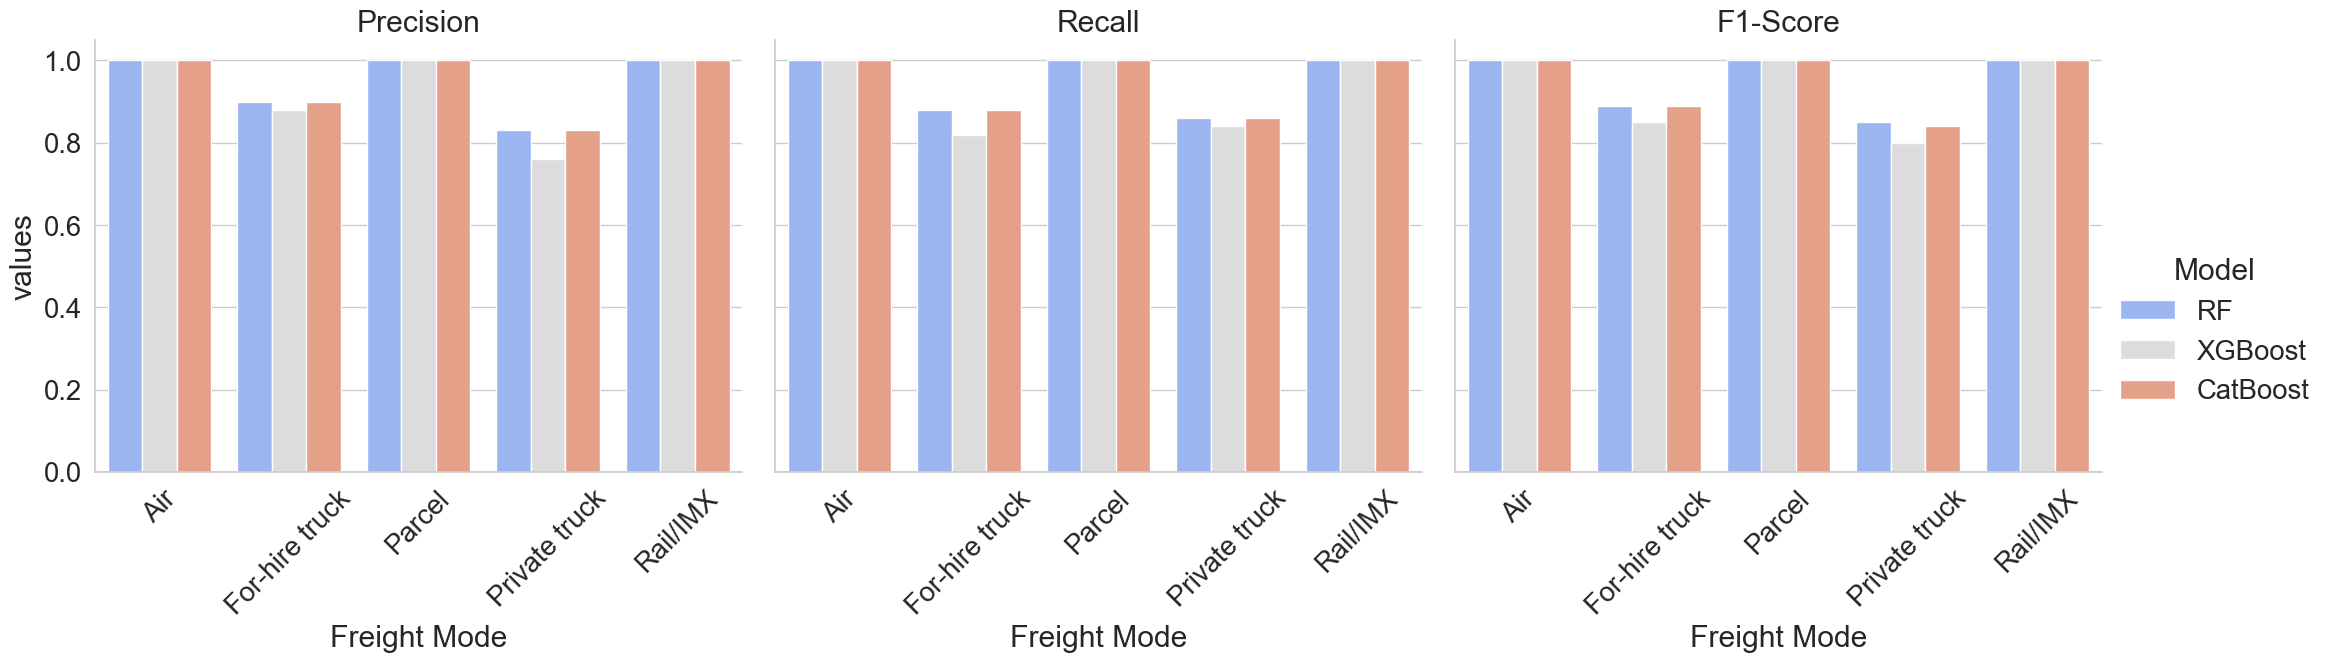

In [7]:
accuracy_measure_by_mode_ML = \
accuracy_measure_by_mode.loc[accuracy_measure_by_mode['Model'].isin(['RF', 'XGBoost', 'CatBoost'])]
#sns.set_style("whitegrid")
ax2 = sns.catplot(data = accuracy_measure_by_mode_ML,
           x = 'Freight Mode', y = 'values', hue = 'Model',
           col = 'measures', kind = 'bar', palette = 'coolwarm',
                 height = 6, aspect = 1.2)
ax2.set_titles("{col_name}")
for axn in ax2.axes.flat:
    for label in axn.get_xticklabels():
        label.set_rotation(45)
        
plt.savefig('plot/accuracy_measure_by_mode_ML.jpg', dpi = 300, bbox_inches = 'tight')

In [8]:
# accuracy aggregated
mode_selected = ['macro average', 'weighted average']
accuracy_measure_agg = \
accuracy_measure.loc[accuracy_measure['Freight Mode'].isin(mode_selected)]
accuracy_measure_agg = pd.melt(accuracy_measure_agg, 
                                id_vars=['Model', 'Freight Mode'], 
                                value_vars=['Precision', 'Recall', 'F1-Score'],
                                var_name='measures', 
                                value_name='values')
accuracy_measure_agg = accuracy_measure_agg.reset_index()
accuracy_measure_agg = accuracy_measure_agg.rename(columns = {'Freight Mode': 'method'})
accuracy_measure_agg.head(5)


,index,Model,method,measures,values
0,0,RF,macro average,Precision,0.95
1,1,RF,weighted average,Precision,0.91
2,2,XGBoost,macro average,Precision,0.93
3,3,XGBoost,weighted average,Precision,0.88
4,4,CatBoost,macro average,Precision,0.95


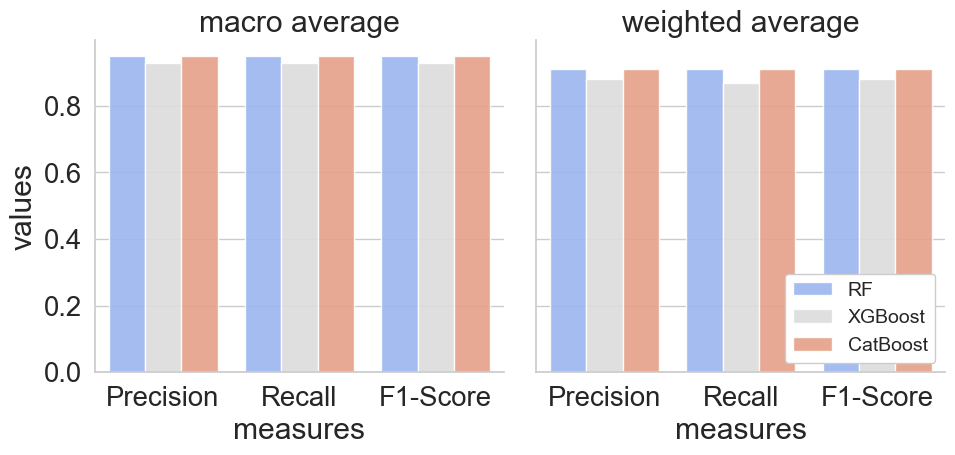

In [9]:
accuracy_measure_agg_ML = \
accuracy_measure_agg.loc[accuracy_measure_agg['Model'].isin(['RF', 'XGBoost', 'CatBoost'])]

#sns.set_style("whitegrid")
ax = sns.catplot(data = accuracy_measure_agg_ML,
           x = 'measures', y = 'values', hue = 'Model',
           col = 'method', kind = 'bar', palette = 'coolwarm',
            alpha = 0.9, height = 5, aspect = 1,
           legend = False)
ax.set_titles("{col_name}")
plt.legend(loc='lower right', facecolor='white',
           framealpha=1, fontsize =14)
plt.savefig('plot/accuracy_measure_aggregation_ML.jpg', dpi = 300, bbox_inches = 'tight')

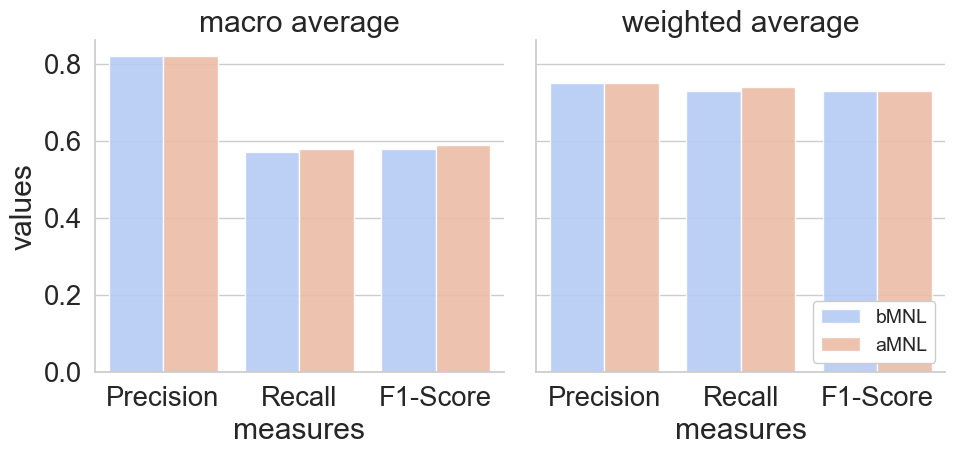

In [10]:
accuracy_measure_agg_MNL = \
accuracy_measure_agg.loc[accuracy_measure_agg['Model'].isin(['bMNL', 'aMNL'])]

sns.set_style("whitegrid")
ax = sns.catplot(data = accuracy_measure_agg_MNL,
           x = 'measures', y = 'values', hue = 'Model',
           col = 'method', kind = 'bar', palette = 'coolwarm',
            alpha = 0.9, height = 5, aspect = 1,
           legend = False)
ax.set_titles("{col_name}")
plt.legend(loc='lower right', facecolor='white',
           framealpha=1, fontsize =14)
plt.savefig('plot/accuracy_measure_aggregation_MNL.jpg', dpi = 300, bbox_inches = 'tight')

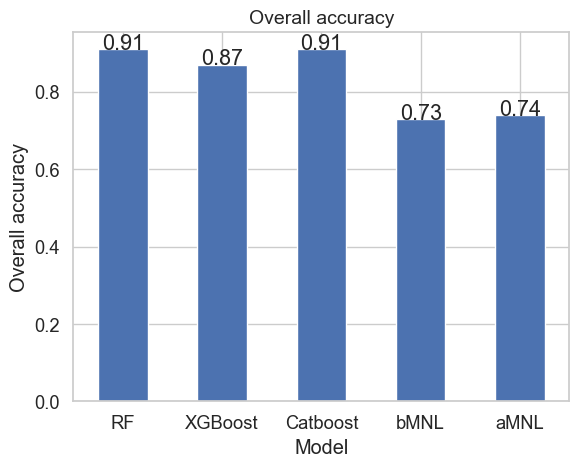

In [15]:
#sns.set(font_scale=1.2)  # larger font
overall_accuracy = read_csv('data/accuracy_measure_overall.csv')
ax = overall_accuracy.plot(x = 'Model', y = 'Accuracy', kind = 'bar', legend = False)
sns.set_theme(style="whitegrid", font_scale=1.3)
for idx, label in enumerate(list(overall_accuracy.index)): 

    value = np.round(overall_accuracy.loc[idx, 'Accuracy'],decimals=2)
    ax.annotate(value,
                (idx, value),
                xytext=(-15, 0), 
                textcoords='offset points')
plt.ylabel('Overall accuracy')
plt.xticks(rotation = 'horizontal')
plt.title('Overall accuracy', fontsize = 14)
plt.savefig('plot/overall_accuracy.jpg', dpi = 300, bbox_inches = 'tight')